<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Title: Median value of owner-occupied homes
y-axis: Median value of owner-occupied homes(x$1000)


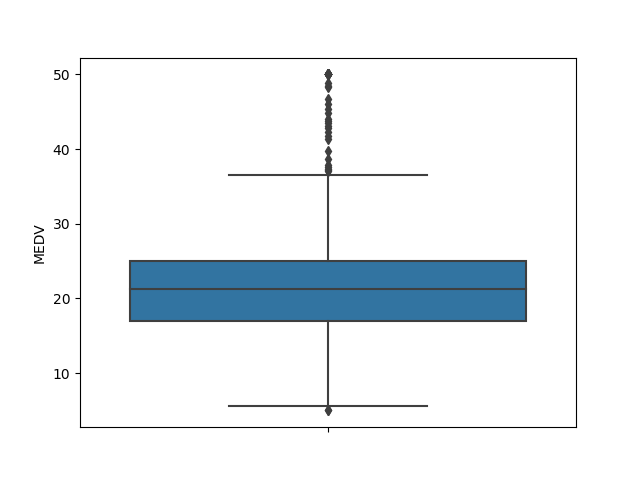

In [9]:
#For the "Median value of owner-occupied homes" provide a boxplot
print("Title: Median value of owner-occupied homes")
print("y-axis: Median value of owner-occupied homes(x$1000)")
sns.boxplot(y = 'MEDV', data = boston_df)
pyplot.show()


The bar plot depicts a comparison between discrete categories. Here, the categories are: not bounded by the Charles river(0.0) and bounded by the Charles river(1.0)


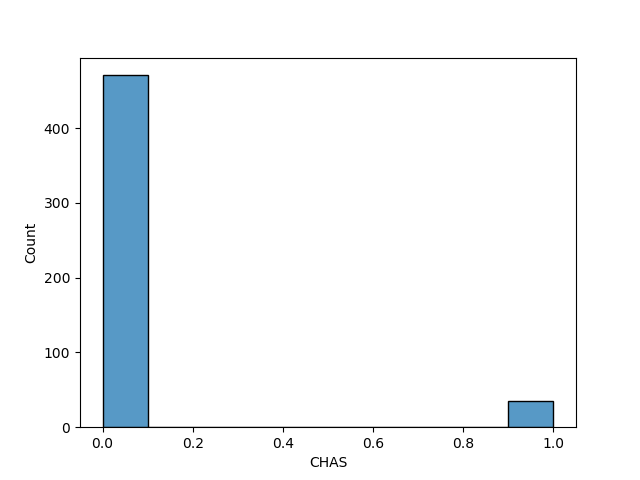

In [28]:
#Provide a  bar plot for the Charles river variable
print()
print("The bar plot depicts a comparison between discrete categories. Here, the categories are: not bounded by the Charles river(0.0) and bounded by the Charles river(1.0)")
sns.histplot(boston_df['CHAS'])
pyplot.show()

A boxplot depicts  minimum, lower quartile, median, upper quartile and maximum values of the given variable. Here, we are looking at the 'AGE' variable, discretized into 3 categories as given below


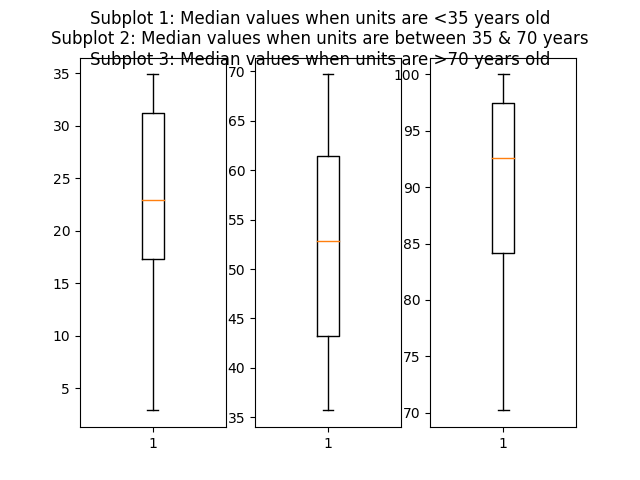

In [30]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
lessthan35 = []
between35and70 = []
morethan70 = []

for i in range(0, 506):
    a = boston_df['AGE'][i]
    if(a < 35.0):
        lessthan35.append(a)
    elif (a>=35.0 and a<70):
        between35and70.append(a)
    else:
        morethan70.append(a)
        
print("A boxplot depicts  minimum, lower quartile, median, upper quartile and maximum values of the given variable. Here, we are looking at the 'AGE' variable, discretized into 3 categories as given below")
fig, (ax1, ax2, ax3) = pyplot.subplots(1, 3)
fig.suptitle('Subplot 1: Median values when units are <35 years old\nSubplot 2: Median values when units are between 35 & 70 years\nSubplot 3: Median values when units are >70 years old\n')
ax1.boxplot(lessthan35)
ax2.boxplot(between35and70)
ax3.boxplot(morethan70)
pyplot.show()

A scatter plot shows the relationship between two quantitative variables (here, 'INDUS' and 'NOX') scored on each other.


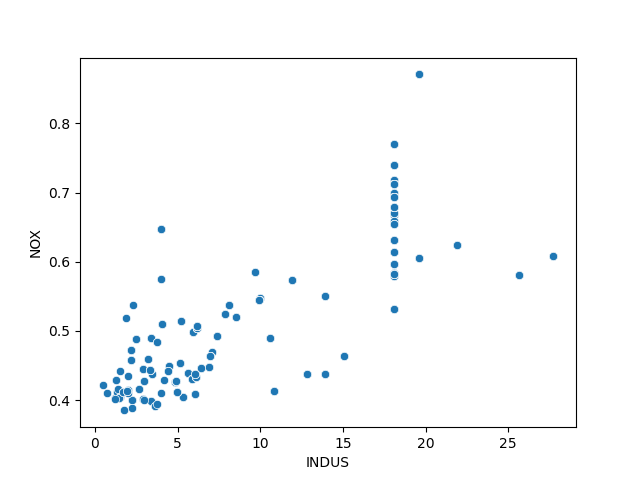

We can observe from the nearly linear correlation that the relationship shows a strong positive correlation between the two variables.


In [34]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
print("A scatter plot shows the relationship between two quantitative variables (here, 'INDUS' and 'NOX') scored on each other.")
    
sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df)
pyplot.show()
print("We can observe from the nearly linear correlation that the relationship shows a strong positive correlation between the two variables.")

The histogram shows the count for the pupil to teacher ratio variable


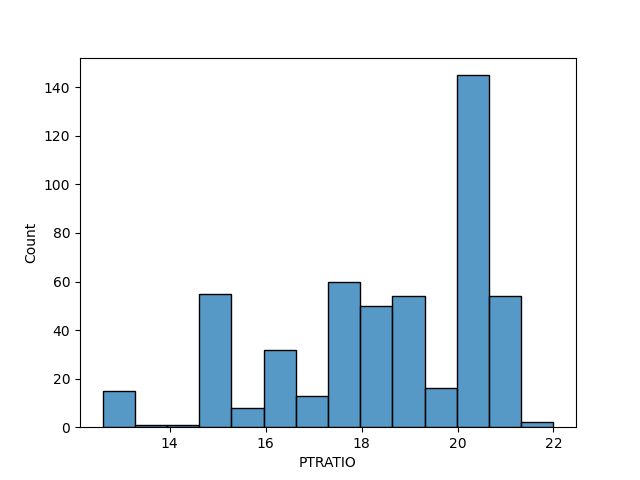

In [35]:
#Create a histogram for the pupil to teacher ratio variable
sns.histplot(data = boston_df, x = 'PTRATIO') 
print("The histogram shows the count for the pupil to teacher ratio variable")
pyplot.show()

In [36]:
#Is there a significant difference in the median value of houses bounded by the Charles river or not?
river = []
no_river = []

for i in range(0, 506):
    if(boston_df['CHAS'][i] == 1.0):
        river.append(boston_df['MEDV'][i])
    else:
        no_river.append(boston_df['MEDV'][i])

t, p = scipy.stats.ttest_ind(river, no_river)

h0 = "There is no significant difference if bounded by Charles variable or not." #H0
print("Null Hypothesis: {}".format(h0))
print("Applying t-test, we get p-value: {}".format(t))
print()

t_alpha = 1.96
if(abs(t) <= t_alpha):
    # rejecting h0
    res = "Conclusion: " + h0 + "(null hypothesis holds)"
else:
    res = "Conclusion: There is a significant difference (null hypothesis rejected). Houses bounded by Charles river have higher median value than those not bound by river."

print(res)


Null Hypothesis: There is no significant difference if bounded by Charles variable or not.
Applying t-test, we get p-value: 3.996437466090509

Conclusion: There is a significant difference (null hypothesis rejected). Houses bounded by Charles river have higher median value than those not bound by river.


In [38]:
#Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

stat, p = scipy.stats.f_oneway(lessthan35, between35and70, morethan70)
print("Applying ANOVA, we get p-value: {}".format(t))
print()

h0 = "There is no significant difference in median value if the owner occupied units are < 35, between 35 & 70 years or >70 years old" #H0
print("Null Hypothesis: {}".format(h0))
print("p-value: {}".format(p))
print()

alpha = 0.05
if(p <= alpha):
    # rejecting h0
    res = "Conclusion: There is a significant difference in median value if the owner occupied units are < 35, between 35 & 70 years or >70 years old (null hypothesis rejected)"
else:
    res = "Conclusion: " + h0 + "(null hypothesis holds)"

print(res)

print()

Applying ANOVA, we get p-value: 3.996437466090509

Null Hypothesis: There is no significant difference in median value if the owner occupied units are < 35, between 35 & 70 years or >70 years old
p-value: 9.005770381051771e-248

Conclusion: There is a significant difference in median value if the owner occupied units are < 35, between 35 & 70 years or >70 years old (null hypothesis rejected)



In [39]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
nox = boston_df['NOX']
indus = boston_df['INDUS']

rho = np.corrcoef(nox, indus)[0,1]
h0 = "There is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town."
print("Null Hypothesis: {}". format(h0))
print()
print("Correlation coefficient (rho) value is {}".format(rho))
print("Conclusion: ", end = '')

if(rho > 0):
    if(rho > 0.6):
        print("Null Hypothesis rejected. There exists a strong positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town")
    else:
        print("Null Hypothesis rejected. There exists a positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town")
elif(rho < 0):
    if(rho < -0.6):
        print("Null Hypothesis holds. There exists a strong negative correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town")
    else:
        print("Null Hypothesis holds. There exists a negative correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town")
else:
    print("Variables are uncorrelated")
    
print()

        
        

Null Hypothesis: There is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

Correlation coefficient (rho) value is 0.763651446920914
Conclusion: Null Hypothesis rejected. There exists a strong positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town



In [40]:
#What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?
from sklearn.linear_model import LinearRegression
import random
x = boston_df['DIS']
y = boston_df['MEDV']
lr_model = sm.OLS(y, x).fit()

print('original coefficient: ', end = '')
print(lr_model.params)


x = sm.add_constant(x) #adding weighted distance

h0 = 'There is no impact of additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.'
print("Null hypothesis: {}". format(h0))
lr_model2 = sm.OLS(y, x).fit()

print(lr_model.summary())
print()
print("From regression results, we can see that p value < alpha value = 0.005. Thus we reject the null hypothesis.")
      

original coefficient: DIS    4.798467
dtype: float64
Null hypothesis: There is no impact of additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.
                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Wed, 08 Mar 2023   Prob (F-statistic):                   1.52e-146
Time:                        00:12:53   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Cova